# Mnist Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets
import seaborn as sn

2024-08-25 02:42:14.248452: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-25 02:42:14.285325: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-25 02:42:14.296539: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-25 02:42:14.361752: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-25 02:42:15.174570: W tensorflow/compiler/tf2

In [25]:
tf.config.list_physical_devices("GPU")

[]

In [29]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12803326117660242398
xla_global_id: -1
]


I0000 00:00:1724579139.112823    6641 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-25 02:45:39.115875: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [2]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
def plot_sample(X, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])

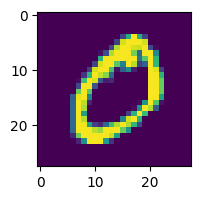

In [5]:
plot_sample(X_train, 1)

# Normalize Data

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# ANN Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
ann = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(2000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(10, activation='softmax')
])

/home/shawn/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1724578936.538554    6641 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-25 02:42:16.577175: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [19]:
ann.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
 409/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - accuracy: 0.8410 - loss: 0.5100

KeyboardInterrupt: 

In [ ]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(pred) for pred in y_pred]

In [ ]:
print(classification_report(y_test, y_pred_classes))

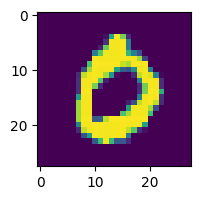

In [48]:
plot_sample(X_test, 3)

In [50]:
def pred_value(index):
    pred = ann.predict(X_test[index:index+1])
    print(np.argmax(pred))
    plot_sample(X_test, index)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step
0


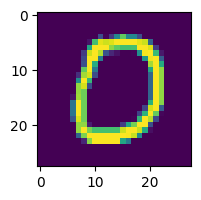

In [52]:
pred_value(10)

Text(95.72222222222221, 0.5, 'Truth')

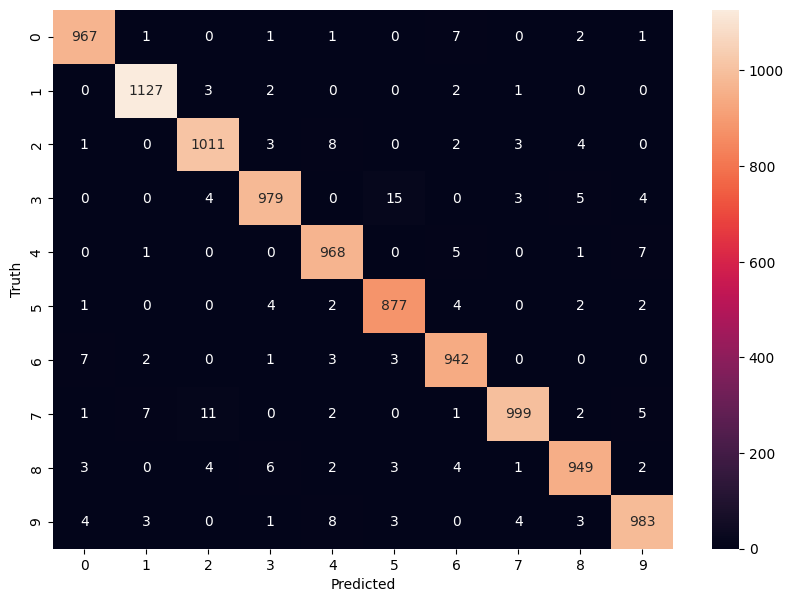

In [54]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')